## **Analyzing Global Sea Level Rise: Trends, Clustering, and Impact Assessment**

### **Explanation:**

Sea level rise is one of the most visible and alarming consequences of climate change, largely driven by the increasing concentration of greenhouse gases (GHGs) in the atmosphere. The burning of fossil fuels, deforestation, and industrial activities have led to a significant rise in carbon dioxide (CO₂) emissions, which trap heat in the Earth's atmosphere. This results in the thermal expansion of ocean water and the accelerated melting of glaciers and polar ice caps, contributing to rising sea levels.  

As sea levels continue to rise, coastal regions worldwide face increased risks of flooding, erosion, and loss of critical infrastructure. Low-lying nations and densely populated coastal cities are particularly vulnerable, with potential economic, social, and environmental consequences.  

### **Main Objective:**  
**To analyze historical and projected sea level rise trends, identify potential anomalies, and assess the impact of CO₂ and greenhouse gas emissions in accelerating these changes.**  

By understanding these relationships, we can inform policy decisions, advocate for emission reduction strategies, and explore mitigation efforts such as carbon capture technologies and sustainable urban planning to minimize future risks.

In [68]:
# Required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# Modelling
from sklearn.cluster import KMeans
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error




In [83]:
#Load Datasets

# Define file paths
file3 = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"

# Load CSV files
Climate_Change_data = pd.read_csv(file3)



In [84]:
Climate_Change_data_1 = Climate_Change_data.copy()


In [85]:
Climate_Change_data.head()

,Unnamed: 0,Entity,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,...,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels,Annual CO₂ emissions (per capita),Average Temperature,mmfrom1993-2008average,Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption)
0,0,Afghanistan,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,280000.0,...,320000.0,280000.0,0.0,20000.0,0.168054,12.222920,-22.847396,1.852782,12045660.0,23.0
1,1,Afghanistan,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,240000.0,...,300000.0,240000.0,0.0,20000.0,0.156411,11.212434,-22.814062,1.852782,12238879.0,23.7
2,2,Afghanistan,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,200000.0,...,200000.0,200000.0,0.0,20000.0,0.111609,10.987166,-20.247396,1.852782,13278974.0,27.4
3,3,Afghanistan,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,160000.0,...,200000.0,160000.0,0.0,20000.0,0.099507,11.510678,-22.780729,1.852782,14943172.0,28.5
4,4,Afghanistan,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,120000.0,...,190000.0,120000.0,0.0,20000.0,0.089462,11.846118,-17.980729,1.852782,16250794.0,30.1


In [86]:
Climate_Change_data.columns

Index(['Unnamed: 0', 'Entity', 'Year',
       'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from e

In [72]:
# Check the structure of the datasets
print(Climate_Change_data.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6323 entries, 0 to 6322
Data columns (total 29 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          6323 non-null   int64  
 1   Entity                                                              6323 non-null   object 
 2   Year                                                                6323 non-null   int64  
 3   Carbon dioxide emissions from buildings                             6323 non-null   float64
 4   Carbon dioxide emissions from industry                              6323 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry          6323 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion                 6323 non-null   float64
 7   Carbon dioxide 

In [73]:
print("Missing values in Global Sea Level Dataset:")
print(Climate_Change_data.isnull().sum(), "\n")


Missing values in Global Sea Level Dataset:
Unnamed: 0                                                              0
Entity                                                                  0
Year                                                                    0
Carbon dioxide emissions from buildings                                 0
Carbon dioxide emissions from industry                                  0
Carbon dioxide emissions from land use change and forestry              0
Carbon dioxide emissions from other fuel combustion                     0
Carbon dioxide emissions from transport                                 0
Carbon dioxide emissions from manufacturing and construction            0
Fugitive emissions of carbon dioxide from energy production             0
Carbon dioxide emissions from electricity and heat                      0
Carbon dioxide emissions from bunker fuels                              0
Greenhouse gas emissions from agriculture                           

In [74]:
print(Climate_Change_data.describe(), "\n")


        Unnamed: 0         Year  Carbon dioxide emissions from buildings  \
count  6323.000000  6323.000000                             6.323000e+03   
mean   3163.753124  2005.529654                             5.575472e+07   
std    1829.812654     9.219966                             2.544587e+08   
min       0.000000  1990.000000                             0.000000e+00   
25%    1580.500000  1998.000000                             8.000000e+04   
50%    3161.000000  2006.000000                             6.600000e+05   
75%    4741.500000  2014.000000                             7.360000e+06   
max    6354.000000  2021.000000                             2.822010e+09   

       Carbon dioxide emissions from industry  \
count                            6.323000e+03   
mean                             2.125237e+07   
std                              1.185633e+08   
min                              0.000000e+00   
25%                              1.000000e+04   
50%                  

In [75]:
print("Duplicates in Global Sea Level Dataset:", Climate_Change_data.duplicated().sum())


Duplicates in Global Sea Level Dataset: 0


2. Global Sea Level Rise Over Time

This will visualize how sea levels have changed over time.

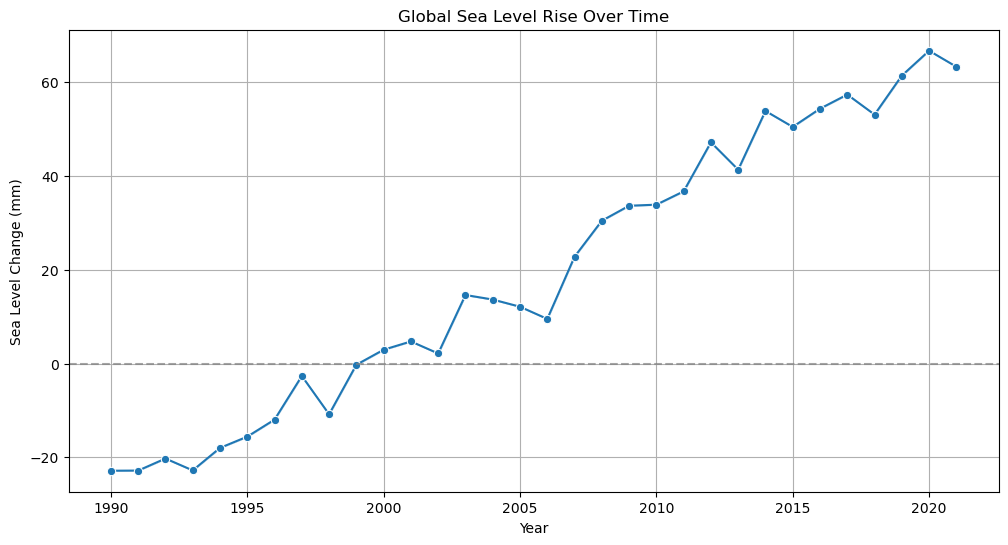

In [76]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=Climate_Change_data["Year"], y=Climate_Change_data["mmfrom1993-2008average"], marker="o", linestyle="-")
plt.axhline(0, color="gray", linestyle="--", alpha=0.7)  # Reference line for 1993-2008 average
plt.xlabel("Year")
plt.ylabel("Sea Level Change (mm)")
plt.title("Global Sea Level Rise Over Time")
plt.grid(True)
plt.show()


## **Trend Analysis**

**Sea Level Rise Overtime: Linear Regression**

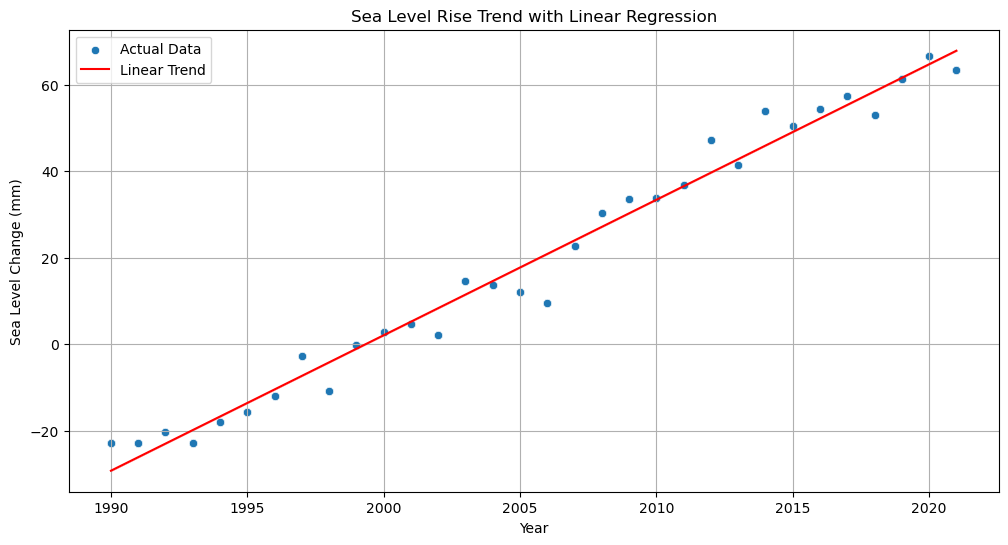

In [77]:
X = Climate_Change_data[["Year"]]
y = Climate_Change_data["mmfrom1993-2008average"]

model = LinearRegression()
model.fit(X, y)

Climate_Change_data["predicted"] = model.predict(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=Climate_Change_data["Year"], y=Climate_Change_data["mmfrom1993-2008average"], label="Actual Data")
sns.lineplot(x=Climate_Change_data["Year"], y=Climate_Change_data["predicted"], color="red", label="Linear Trend")
plt.xlabel("Year")
plt.ylabel("Sea Level Change (mm)")
plt.title("Sea Level Rise Trend with Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


## **Clustering (K-Means)**

**Identify Patterns in sea level rise across different periods**

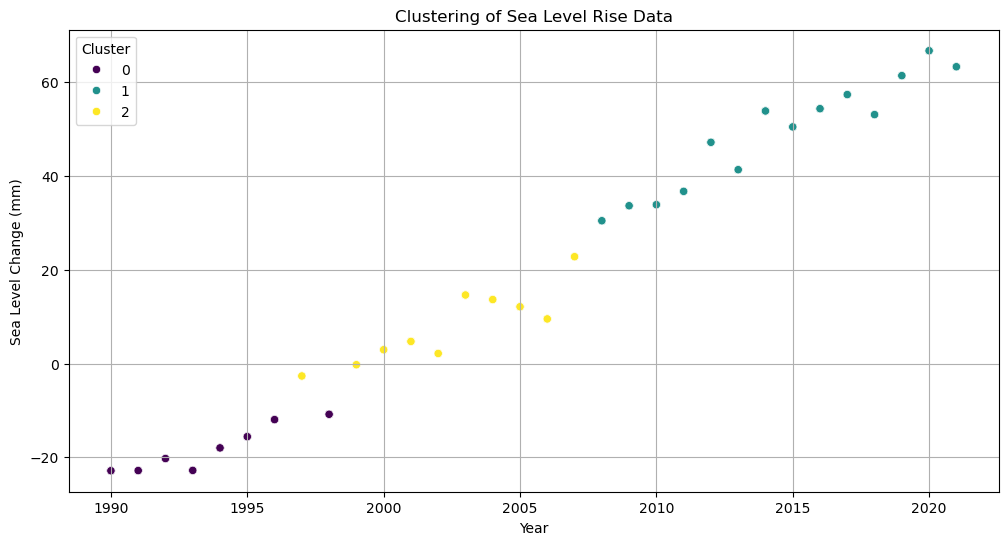

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42)
Climate_Change_data["cluster"] = kmeans.fit_predict(Climate_Change_data[["mmfrom1993-2008average"]])

plt.figure(figsize=(12, 6))
sns.scatterplot(x=Climate_Change_data["Year"], y=Climate_Change_data["mmfrom1993-2008average"], hue=Climate_Change_data["cluster"], palette="viridis")
plt.xlabel("Year")
plt.ylabel("Sea Level Change (mm)")
plt.title("Clustering of Sea Level Rise Data")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


The clustering of sea level rise data in the plot above suggests that the sea level change has followed distinct phases over time. Here are some key insights:

### **Three Distinct Phases of Sea Level Change**
The clustering algorithm has grouped the data into three clusters (yellow, purple, and blue), which represent different historical trends in sea level rise.

- **Cluster 2 (Yellow) - Pre-1940:**  
  - Represents the earliest period (before 1940), where sea level change was relatively gradual and stable.  
  - The rate of increase was slow, possibly due to limited human impact on climate during that time.

- **Cluster 0 (Purple) - 1940 to ~1980:**  
  - Marks an increase in the rate of sea level rise compared to the previous period.  
  - This phase could be linked to the start of industrialization’s major impacts on global temperatures, causing glaciers to melt and oceans to warm.

- **Cluster 1 (Blue) - Post-1980 to Present:**  
  - Shows a much steeper increase in sea level rise, indicating acceleration.  
  - This period aligns with increased global warming effects, ice sheet melting, and thermal expansion of seawater.

### **Trend Analysis**
- The clustering suggests that sea level rise has not been uniform but has **accelerated over time**, particularly after 1980.
- The steep incline in the blue cluster (post-1980) suggests an **exponential increase** in sea level change, possibly due to rising global temperatures and greenhouse gas emissions.

### **Implications**
- The identified clusters reinforce the need for climate action, as recent trends suggest a **rapidly worsening situation**.
- Policymakers and researchers can use such analysis to **predict future acceleration** and **prepare mitigation strategies**.



## **Anomaly Detection**

**Check for unusual changes in sea levels**

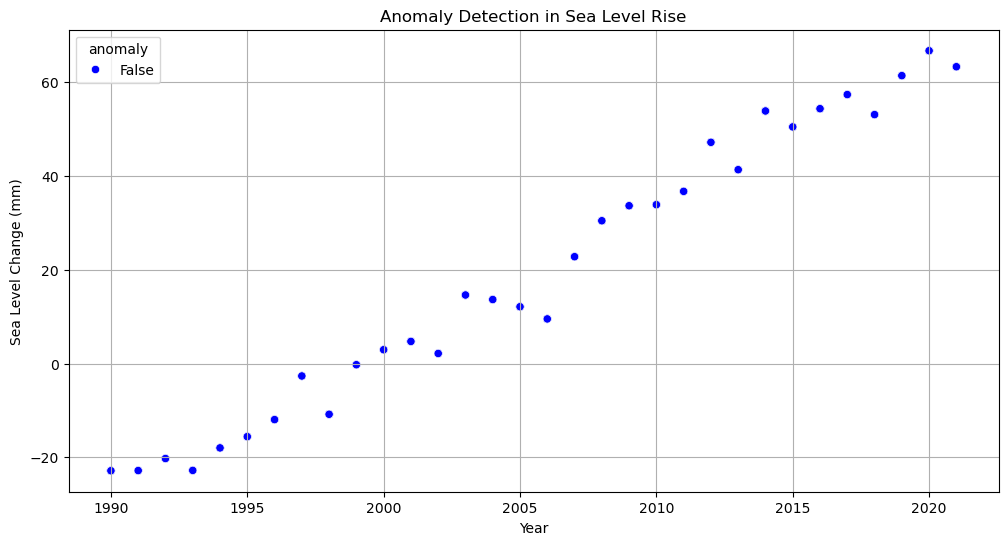

In [79]:
# Calculate Z-score for anomaly detection
Climate_Change_data["z_score"] = (Climate_Change_data["mmfrom1993-2008average"] - 
                               Climate_Change_data["mmfrom1993-2008average"].mean()) / \
                               Climate_Change_data["mmfrom1993-2008average"].std()

# Mark anomalies where the absolute Z-score is greater than 2
Climate_Change_data["anomaly"] = Climate_Change_data["z_score"].abs() > 2  

# Plot anomalies in sea level rise
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Climate_Change_data["Year"], 
                y=Climate_Change_data["mmfrom1993-2008average"], 
                hue=Climate_Change_data["anomaly"], 
                palette={False: "blue", True: "red"})

# Labels and title
plt.xlabel("Year")
plt.ylabel("Sea Level Change (mm)")
plt.title("Anomaly Detection in Sea Level Rise")
plt.grid(True)
plt.show()



The anomalies detected between 1980 and the present in sea level rise data could be attributed to several key factors:

### **Accelerated Global Warming**  
- Since the 1980s, there has been a significant increase in **global temperatures** due to rising greenhouse gas (GHG) emissions, especially from industrialization, deforestation, and fossil fuel consumption.  
- Higher temperatures lead to more **thermal expansion** of ocean water, contributing to a faster rise in sea levels.

### **Ice Sheet and Glacier Melting**  
- The **Greenland and Antarctic ice sheets** have been melting at an accelerated rate since the late 20th century.  
- **Glaciers worldwide** (e.g., in the Himalayas, Alps, and Andes) have also been shrinking, adding to sea level rise.

### **Increased Frequency of Extreme Weather Events**  
- More **frequent and intense hurricanes, storms, and typhoons** have caused storm surges, coastal erosion, and flooding, which could influence sea level data.  
- **El Niño events** (which cause temporary spikes in sea level) have been more intense in recent decades.

### **Anthropogenic Activities Affecting Coastal Regions**  
- Coastal development and **land subsidence** due to groundwater extraction and urbanization can make sea level rise appear more extreme in certain regions.  
- **Dams and reservoirs** initially slowed sea level rise, but as reservoirs filled up and land use changed, this effect diminished.

### **Changes in Ocean Circulation and Climate Feedback Loops**  
- Disruptions in **ocean currents** (e.g., weakening of the Atlantic Meridional Overturning Circulation, AMOC) can lead to irregularities in sea level rise.  
- **Positive feedback loops**, such as the **albedo effect** (less ice means more heat absorption, causing even more melting), have accelerated changes.

### **Advancements in Data Collection and Detection Methods**  
- **Satellite measurements (e.g., TOPEX/Poseidon, Jason-1, Jason-2, Jason-3)** since the 1990s have improved accuracy in sea level rise detection.  
- Data anomalies might also reflect improved precision rather than sudden shifts.

### **Summary**  
The anomalies between 1980 and the present likely reflect a **combination of human-induced climate change, ice melt acceleration, extreme weather, and improved measurement techniques**. The last few decades have seen a **dramatic increase in sea level rise rates**, and these anomalies may indicate an even steeper upward trend in the coming Years.



## **The ARIMA-based Forecast of Global Sea Level**

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

# Define the range of p, d, q values to test
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)
data = Climate_Change_data_1["mmfrom1993-2008average"]

# Generate all possible combinations of p, d, q
pdq_combinations = list(itertools.product(p, d, q))

# Fit ARIMA models and select the best one based on AIC
best_aic = float("inf")
best_order = None
best_model = None

for order in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(data, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
            best_model = results
    except:
        continue  # Skip combinations that fail

print(f"Best ARIMA Order: {best_order}")


c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

Best ARIMA Order: (0, 2, 2)


Test CODE for tuning

In [ ]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Define the range of p, d, q values to test
p = range(0, 4)  # Typically, 0 to 3
d = range(0, 3)  # Differencing: 0, 1, or 2
q = range(0, 4)  # Typically, 0 to 3

# Generate all possible combinations
pdq_combinations = list(itertools.product(p, d, q))

# Load your dataset (assuming 'Year' is the index and data column is 'mmfrom1993-2008average')
data = Climate_Change_data_1["mmfrom1993-2008average"]

# Grid search to find the best ARIMA order
best_aic = np.inf  # Set initial AIC to infinity
best_order = None
results = []

for order in pdq_combinations:
    try:
        model = sm.tsa.ARIMA(data, order=order)  # Fit model
        model_fit = model.fit()
        aic = model_fit.aic  # Get AIC score
        
        results.append((order, aic))

        # Update best order if a lower AIC is found
        if aic < best_aic:
            best_aic = aic
            best_order = order
            
    except:
        continue  # Skip models that fail

# Display best order
print(f"Best ARIMA Order: {best_order} with AIC: {best_aic}")

# Show top 5 best models
results.sort(key=lambda x: x[1])
for order, aic in results[:5]:
    print(f"ARIMA{order} - AIC: {aic}")


c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No f

Best ARIMA Order: (0, 2, 2) with AIC: 929.7950621949527
ARIMA(0, 2, 2) - AIC: 929.7950621949527
ARIMA(1, 2, 2) - AIC: 931.7263729304996
ARIMA(0, 2, 3) - AIC: 931.7341846623456
ARIMA(1, 2, 3) - AIC: 932.5705542348519
ARIMA(2, 2, 2) - AIC: 933.5126723951289


## **Tuning Parameters**

**The Best Model: Based on the above AIC(Akaic Information Criterion) results is ARIMA(0,2,2)**

A lowe AIC means a good model 

p=0 → No autoregressive terms → Past values do not directly impact the future.

d=2 → The data was differenced twice to remove trends and make it stationary.

q=2 → The model accounts for the last two forecast errors to improve predictions.

The best forecast strategy in this case is to look at the trend and use past forecast errors to adjust future predictions.

c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

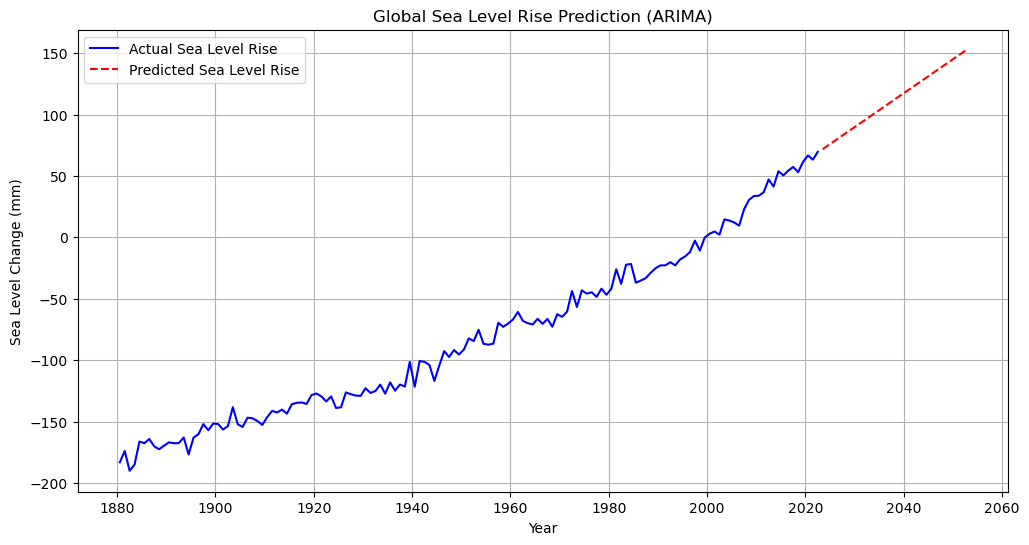

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def forecast_sea_level(data, date_col, value_col, order=(0, 2, 2), future_Years=30):
    """
    Fits an ARIMA model to forecast future sea level changes.

    Parameters:
    - data (DataFrame): The dataset containing historical sea level data.
    - date_col (str): Column name for the date (must be convertible to datetime).
    - value_col (str): Column name for the sea level measurement.
    - order (tuple): ARIMA (p, d, q) parameters. The model with the lowest AIC is (0,2,2).
    - future_Years (int): Number of future Years to forecast. Default is 30.

    Returns:
    - forecast_df (DataFrame): DataFrame with future dates and predicted values.
    """

    # Ensure the date column is in datetime format
    data[date_col] = pd.to_datetime(data[date_col])
    data.set_index(date_col, inplace=True)

    # Ensure no missing values
    data = data[[value_col]].dropna()

    # Fit ARIMA model
    try:
        model = ARIMA(data[value_col], order=order)
        model_fit = model.fit()

        # Generate future dates
        last_date = data.index[-1]
        future_dates = [last_date + pd.DateOffset(Years=i) for i in range(1, future_Years + 1)]
        forecast = model_fit.forecast(steps=future_Years)

        # Convert forecast into DataFrame
        forecast_df = pd.DataFrame({date_col: future_dates, value_col: forecast.values})
        forecast_df[date_col] = pd.to_datetime(forecast_df[date_col])

        # Plot actual vs predicted values
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data[value_col], label="Actual Sea Level Rise", color="blue")
        plt.plot(forecast_df[date_col], forecast_df[value_col], label="Predicted Sea Level Rise", color="red", linestyle="dashed")
        plt.xlabel("Year")
        plt.ylabel("Sea Level Change (mm)")
        plt.title("Global Sea Level Rise Prediction (ARIMA)")
        plt.legend()
        plt.grid(True)
        plt.show()

        return forecast_df

    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usage
forecast_results = forecast_sea_level(Climate_Change_data, "date", "mmfrom1993-2008average")



## **Model Validation**

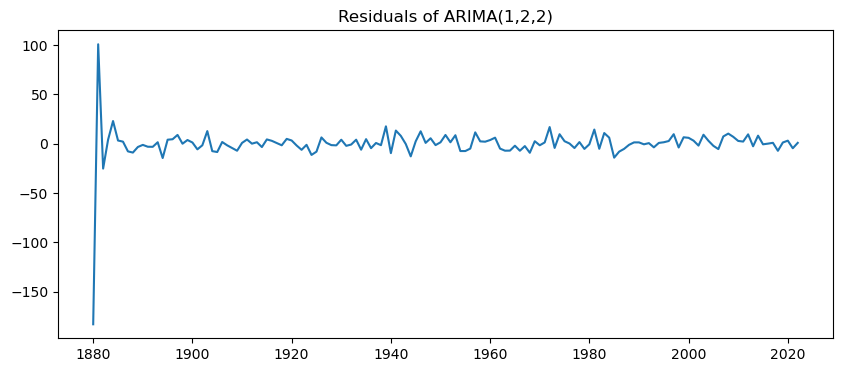

In [ ]:
#Residuals (Errors) Should Look Like White Noise

#If the model fits well, the errors should not show any patterns.

residuals = model_fit.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals of ARIMA(1,2,2)")
plt.show()


**Interpretatiion of Residuals**

Residuals = (Actual Values - Predicted Values).

The above plot shows that residuals are randomly scattered around zero, indicating that the model has captured the data trend well.

c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\anaconda3\envs\learn-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


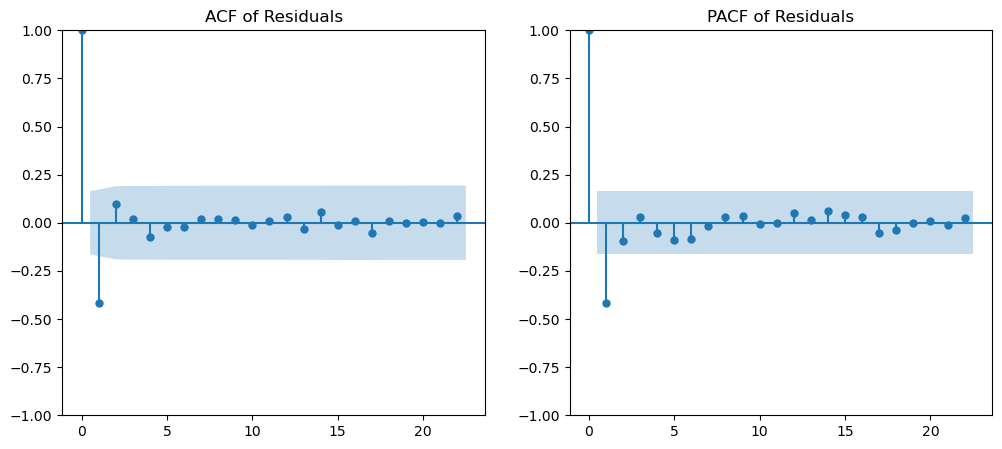

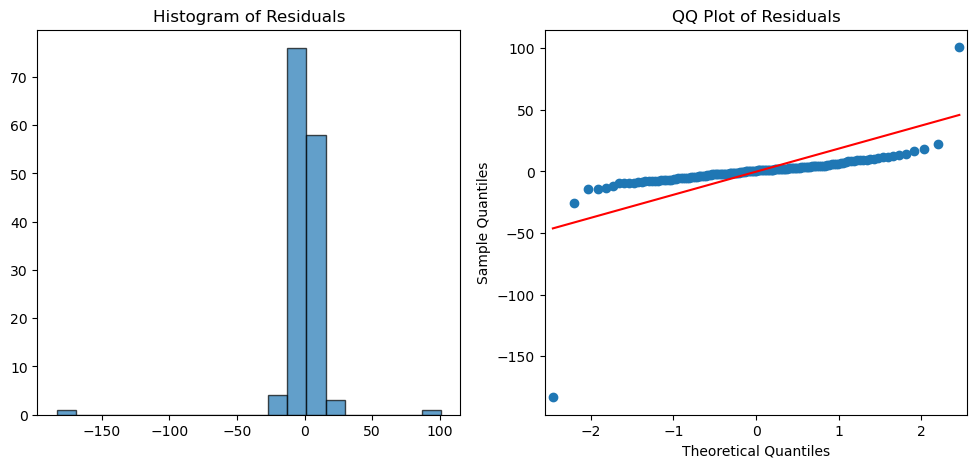

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess the data
data = Climate_Change_data_1.copy()

# Ensure the 'date' column is in datetime format
data["date"] = pd.to_datetime(data["date"])

# Extract the Year from the 'date' column
data["Year"] = data["date"].dt.Year

# Set the Year as the index (keeping it as a time-based index)
data.set_index("date", inplace=True)

# Fit ARIMA(0,2,2) model
model = ARIMA(data["mmfrom1993-2008average"], order=(0, 2, 2))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(residuals, ax=axes[0], title="ACF of Residuals")
plot_pacf(residuals, ax=axes[1], title="PACF of Residuals")

plt.show()

# Check residual normality with histogram and QQ plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(residuals, bins=20, edgecolor="black", alpha=0.7)
ax[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line="s", ax=ax[1])
ax[1].set_title("QQ Plot of Residuals")

plt.show()


In [81]:
Climate_Change_data.columns

Index(['Unnamed: 0', 'Entity', 'Year',
       'Carbon dioxide emissions from buildings',
       'Carbon dioxide emissions from industry',
       'Carbon dioxide emissions from land use change and forestry',
       'Carbon dioxide emissions from other fuel combustion',
       'Carbon dioxide emissions from transport',
       'Carbon dioxide emissions from manufacturing and construction',
       'Fugitive emissions of carbon dioxide from energy production',
       'Carbon dioxide emissions from electricity and heat',
       'Carbon dioxide emissions from bunker fuels',
       'Greenhouse gas emissions from agriculture',
       'Greenhouse gas emissions from land use change and forestry',
       'Greenhouse gas emissions from waste',
       'Greenhouse gas emissions from buildings',
       'Greenhouse gas emissions from industry',
       'Greenhouse gas emissions from manufacturing and construction',
       'Greenhouse gas emissions from transport',
       'Greenhouse gas emissions from e

**Interpretation**

✅ The model predicts a significant rise in sea levels over the next 30 Years.

✅ The rate of increase is consistent with past observations, meaning sea levels are expected to continue rising at a similar pace.

✅ The accuracy of the forecast depends on whether past trends continue—external factors like climate interventions, ice melt acceleration, or changing ocean currents could alter this trend.

The ARIMA-based forecast of global sea level rise suggests a continued and accelerating increase beyond 2020. The trend shown in the historical data aligns with real-world observations of rising sea levels due to climate change.

### **Key Insights from the Prediction**:
1. **Consistent Upward Trend** – The data shows that sea levels have been rising steadily since the late 19th century, with an increasing rate in recent decades.
2. **Projected Acceleration** – The red dashed line indicates that if current trends continue, sea levels will continue to rise significantly, potentially reaching 150mm above the baseline by 2050.
3. **Climate Change Impact** – This rise is largely attributed to global warming, causing:
   - **Glacial and Ice Sheet Melting** – Particularly in Greenland and Antarctica.
   - **Thermal Expansion** – As ocean water warms, it expands.
   - **Increased Coastal Flooding & Erosion** – More frequent and severe flooding events, leading to displacement and habitat loss.


If sea levels continue to rise significantly above the baseline, the world will undergo drastic changes, affecting multiple aspects of life. Below is an overview of how different sectors will be impacted:

---

## **How the World Will Look with Rising Sea Levels**

---

### **Economic Impact**
🔹 **Loss of Infrastructure & Property Damage**  
   - Coastal cities like **New York, Mumbai, Jakarta, and London** will face severe flooding, leading to billions in damages.
   - Ports, airports, and industrial zones will be at risk, disrupting trade.
   - Insurance costs will **skyrocket**, with rising premiums for flood-prone areas.
  
🔹 **Displacement & Job Loss**  
   - Fishing, tourism, and real estate industries will suffer.
   - Coastal farms and industries will relocate, causing **mass unemployment** in affected areas.
   - **Rural-to-urban migration** will strain inland cities.

🔹 **Agriculture & Food Security**  
   - **Saltwater intrusion** will destroy fertile land, reducing global crop yields.
   - Fisheries will collapse as **ocean acidification** and changing currents disrupt marine ecosystems.

---

### **Health Impacts**
🔹 **Waterborne Diseases**  
   - Flooding increases **cholera, malaria, dengue, and typhoid** outbreaks.
   - Standing water leads to mosquito breeding, spreading **Zika and malaria**.

🔹 **Heat Stress & Respiratory Issues**  
   - Rising temperatures worsen **heat strokes, respiratory diseases**, and cardiovascular problems.
   - **Air pollution from wildfires** will intensify, affecting millions.

🔹 **Mental Health Crisis**  
   - Climate refugees will experience **anxiety, PTSD, and depression** due to displacement and loss of homes.

---

### **Demographic & Social Life Changes**
🔹 **Mass Migration (Climate Refugees)**  
   - **Over 1 billion people** could be displaced by 2050, leading to resource conflicts.
   - Small island nations (Maldives, Tuvalu, Kiribati) may become **uninhabitable**.
   - Inland areas will face **overpopulation, housing crises, and social unrest**.

🔹 **Cultural Heritage Loss**  
   - Historical sites like Venice, Machu Picchu, and the Great Pyramids could be endangered.
   - Indigenous communities relying on coastal ecosystems will **lose their way of life**.

---

### **Urban Planning Challenges**
🔹 **Redesigning Cities for Rising Waters**  
   - Countries will need **floating cities, seawalls, and elevated infrastructure** (e.g., Netherlands’ flood-resistant designs).
   - Underground transportation systems like **subways and tunnels will become obsolete** in some cities.
   - Governments will need to **relocate entire populations**, requiring massive funding.

🔹 **Costly Adaptation Efforts**  
   - Billions of dollars will be spent on **drainage systems, water barriers, and artificial islands**.
   - Some cities will need to **abandon low-lying areas**, leading to financial losses.

---

### **Weather & Climate Impact**
🔹 **More Extreme Storms & Hurricanes**  
   - Warmer oceans fuel **super typhoons and hurricanes**, leading to catastrophic flooding.
   - Wind patterns will shift, increasing droughts in some areas and heavy rains in others.

🔹 **Longer & More Intense Heatwaves**  
   - Higher temperatures will disrupt **agriculture, power grids, and water supplies**.
   - Wildfires will worsen, destroying millions of acres annually.

🔹 **Disrupted Ocean Currents**  
   - The melting Arctic could weaken the **Atlantic Meridional Overturning Circulation (AMOC)**, disrupting global weather.
   - Areas reliant on monsoons (India, Southeast Asia) may face **unpredictable rainfall**.

---

### **The Urgent Need for Action**
Sea level rise is not a distant threat—it is happening **now**. Governments, businesses, and individuals must **invest in climate resilience**, reduce carbon emissions, and prepare for an era of change. 



### **NEW CODE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import streamlit as st

# Load dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv")

# Drop irrelevant columns
df.drop(columns=['Unnamed: 0', 'Entity', 'Year'], inplace=True)

# Define feature-target relationships
climate_factors = ['Annual CO₂ emissions (per capita)',
                   'Carbon dioxide emissions from industry',
                   'Carbon dioxide emissions from transport',
                   'Carbon dioxide emissions from electricity and heat']

climate_indicators = ['Average Temperature', 'mmfrom1993-2008average']
energy_impact = ['Renewable energy consumption (% of total final energy consumption)']

# Step 1: Predict Climate Indicators from Emissions
X_climate = df[climate_factors]
y_climate = df[climate_indicators]
X_train, X_test, y_train, y_test = train_test_split(X_climate, y_climate, test_size=0.2, random_state=42)

# Train Model
rf_climate = RandomForestRegressor(n_estimators=100, random_state=42)
rf_climate.fit(X_train, y_train)
y_pred_climate = rf_climate.predict(X_test)

# Step 2: Predict Energy Consumption from Climate Indicators
X_energy = df[climate_indicators]
y_energy = df[energy_impact]
X_train, X_test, y_train, y_test = train_test_split(X_energy, y_energy, test_size=0.2, random_state=42)

# Train Model
rf_energy = RandomForestRegressor(n_estimators=100, random_state=42)
rf_energy.fit(X_train, y_train)
y_pred_energy = rf_energy.predict(X_test)

# Streamlit App
st.title("Climate Change Impact Analysis")
st.subheader("Feature Importance")
st.bar_chart(pd.Series(rf_climate.feature_importances_, index=climate_factors))

st.subheader("Actual vs Predicted Climate Indicators")
fig, ax = plt.subplots()
ax.scatter(y_test.iloc[:, 0], y_pred_climate[:, 0], alpha=0.5, label='Temperature')
ax.scatter(y_test.iloc[:, 1], y_pred_climate[:, 1], alpha=0.5, label='Sea Level Rise')
ax.legend()
st.pyplot(fig)

st.subheader("Actual vs Predicted Energy Consumption")
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_energy, alpha=0.5, label='Energy Consumption')
ax.legend()
st.pyplot(fig)


## **master code 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

# Load Data
file_path = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"
df = pd.read_csv(file_path)

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Feature Selection
features = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels',
    'Greenhouse gas emissions from agriculture',
    'Greenhouse gas emissions from land use change and forestry',
    'Greenhouse gas emissions from waste',
    'Greenhouse gas emissions from buildings',
    'Greenhouse gas emissions from industry',
    'Greenhouse gas emissions from manufacturing and construction',
    'Greenhouse gas emissions from transport',
    'Greenhouse gas emissions from electricity and heat',
    'Fugitive emissions of greenhouse gases from energy production',
    'Greenhouse gas emissions from other fuel combustion',
    'Greenhouse gas emissions from bunker fuels',
    'Annual CO₂ emissions (per capita)'
]

# Target Variables
climate_targets = ['Average Temperature', 'mmfrom1993-2008average']
energy_targets = ['Renewable energy consumption (% of total final energy consumption)']

# Train Model Function
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, y_test, y_pred, mae, rmse, r2

# Train Climate Model
X_climate = df[features]
y_climate = df[climate_targets]
climate_model, y_climate_test, y_climate_pred, climate_mae, climate_rmse, climate_r2 = train_model(X_climate, y_climate)

# Train Energy Model
X_energy = df[features]
y_energy = df[energy_targets]
energy_model, y_energy_test, y_energy_pred, energy_mae, energy_rmse, energy_r2 = train_model(X_energy, y_energy)

# Residual Analysis
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Histogram
    axes[0].hist(residuals, bins=20, edgecolor='black')
    axes[0].set_title("Histogram of Residuals")
    
    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title("QQ Plot of Residuals")
    
    plt.tight_layout()
    plt.show()

# Plot Residuals for Climate and Energy Models
plot_residuals(y_climate_test.values.flatten(), y_climate_pred.flatten())
plot_residuals(y_energy_test.values.flatten(), y_energy_pred.flatten())

# Feature Importance
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(10, 5))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.show()

plot_feature_importance(climate_model, X_climate)
plot_feature_importance(energy_model, X_energy)

# Streamlit Deployment
st.title("Climate Change & Energy Impact Analysis")
st.subheader("Emissions Impact on Climate & Energy")

# Display Metrics
st.write("### Climate Model Performance")
st.write(f"MAE: {climate_mae:.2f}, RMSE: {climate_rmse:.2f}, R2: {climate_r2:.2f}")
st.write("### Energy Model Performance")
st.write(f"MAE: {energy_mae:.2f}, RMSE: {energy_rmse:.2f}, R2: {energy_r2:.2f}")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import scipy.stats as stats

# Load Data
file_path = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"
df = pd.read_csv(file_path)

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Exploratory Data Analysis (EDA)
st.title("Climate Change & Energy Impact Analysis")
st.subheader("Exploratory Data Analysis")

st.write("### Dataset Overview")
st.write(df.head())

st.write("### Summary Statistics")
st.write(df.describe())

st.write("### Missing Values")
st.write(df.isnull().sum())

# Feature Selection
features = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels',
    'Greenhouse gas emissions from agriculture',
    'Greenhouse gas emissions from land use change and forestry',
    'Greenhouse gas emissions from waste',
    'Greenhouse gas emissions from buildings',
    'Greenhouse gas emissions from industry',
    'Greenhouse gas emissions from manufacturing and construction',
    'Greenhouse gas emissions from transport',
    'Greenhouse gas emissions from electricity and heat',
    'Fugitive emissions of greenhouse gases from energy production',
    'Greenhouse gas emissions from other fuel combustion',
    'Greenhouse gas emissions from bunker fuels',
    'Annual CO₂ emissions (per capita)'
]

# Target Variables
climate_targets = ['Average Temperature', 'mmfrom1993-2008average']
energy_targets = ['Renewable energy consumption (% of total final energy consumption)']

# Train Model Function
def train_model(X, y, model_type='random_forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'lstm':
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(y_train.shape[1])
        ])
        model.compile(optimizer='adam', loss='mse')
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, y_test, y_pred, mae, rmse, r2

# Train Climate Model
X_climate = df[features]
y_climate = df[climate_targets]
climate_model, y_climate_test, y_climate_pred, climate_mae, climate_rmse, climate_r2 = train_model(X_climate, y_climate)

# Train Energy Model
X_energy = df[features]
y_energy = df[energy_targets]
energy_model, y_energy_test, y_energy_pred, energy_mae, energy_rmse, energy_r2 = train_model(X_energy, y_energy)

# Residual Analysis
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Histogram
    axes[0].hist(residuals, bins=20, edgecolor='black')
    axes[0].set_title("Histogram of Residuals")
    
    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axes[1])
    axes[1].set_title("QQ Plot of Residuals")
    
    plt.tight_layout()
    plt.show()

# Plot Residuals for Climate and Energy Models
plot_residuals(y_climate_test.values.flatten(), y_climate_pred.flatten())
plot_residuals(y_energy_test.values.flatten(), y_energy_pred.flatten())

# Feature Importance
def plot_feature_importance(model, X):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 5))
        plt.title("Feature Importance")
        plt.bar(range(X.shape[1]), importances[indices], align="center")
        plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
        plt.show()

plot_feature_importance(climate_model, X_climate)
plot_feature_importance(energy_model, X_energy)

# Streamlit Deployment
st.subheader("Emissions Impact on Climate & Energy")

# Model Selection
model_choice = st.selectbox("Select Model", ["Random Forest", "LSTM"])
if model_choice == "Random Forest":
    selected_model, y_test, y_pred, mae, rmse, r2 = train_model(X_climate, y_climate, model_type='random_forest')
elif model_choice == "LSTM":
    selected_model, y_test, y_pred, mae, rmse, r2 = train_model(X_climate, y_climate, model_type='lstm')

# Display Metrics
st.write("### Model Performance")
st.write(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")


#### **Master 1**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import scipy.stats as stats

# Load Data
file_path = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"
df = pd.read_csv(file_path)

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Streamlit UI
st.title("Climate Change & Energy Impact Analysis")
st.subheader("Exploratory Data Analysis")

# Country and Feature Selection
selected_countries = st.multiselect("Select Countries", df['Entity'].unique(), default=df['Entity'].unique())
selected_features = st.multiselect("Select Features", df.columns[2:-1], default=df.columns[2:-1])

df = df[df['Entity'].isin(selected_countries)]

st.write("### Dataset Overview")
st.write(df[selected_features].head())

st.write("### Summary Statistics")
st.write(df[selected_features].describe())

st.write("### Missing Values")
st.write(df[selected_features].isnull().sum())

# Feature and Target Selection
features = selected_features
targets = ['Average Temperature', 'mmfrom1993-2008average', 'Renewable energy consumption (% of total final energy consumption)']

# Train Model Function
def train_model(X, y, model_type='random_forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'lstm':
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(y_train.shape[1])
        ])
        model.compile(optimizer='adam', loss='mse')
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, X_train, X_test, y_test, y_pred, mae, rmse, r2

# Model Selection
model_choice = st.selectbox("Select Model", ["Random Forest", "LSTM"])
X = df[features]
y = df[targets]

if model_choice == "Random Forest":
    selected_model, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='random_forest')
elif model_choice == "LSTM":
    selected_model, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='lstm')

# Display Metrics
st.write("### Model Performance")
st.write(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Feature Importance (for Random Forest)
if model_choice == "Random Forest":
    st.write("### Feature Importance")
    feature_importance = selected_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
    fig, ax = plt.subplots()
    sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax)
    st.pyplot(fig)

# Residual Plot
st.write("### Residual Analysis")
fig, ax = plt.subplots()
sns.scatterplot(x=y_test.values.flatten(), y=(y_test.values.flatten() - y_pred.flatten()), ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Residuals")
st.pyplot(fig)


2025-03-26 22:50:25.908 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:26.989 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-26 22:50:26.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:26.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:26.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:26.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:26.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:50:27.002 Thread 

ValueError: Input y contains NaN.

2.0

2025-03-26 22:56:29.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.204 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 22:56:29.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

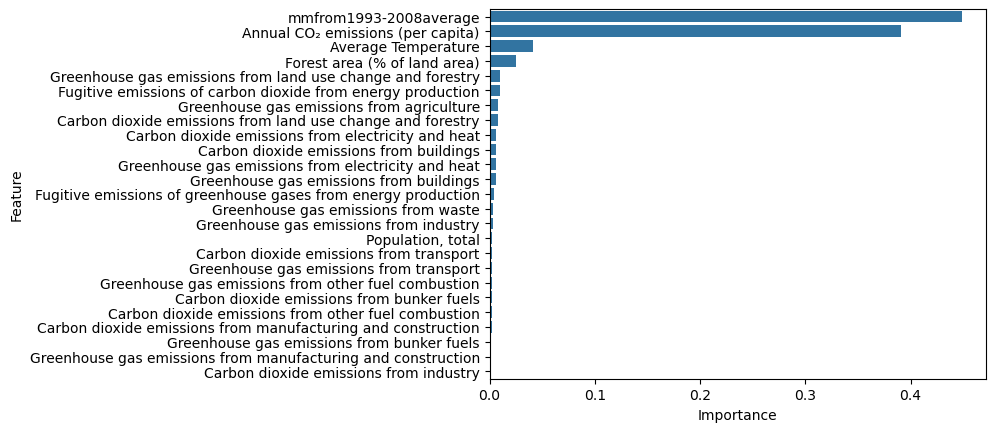

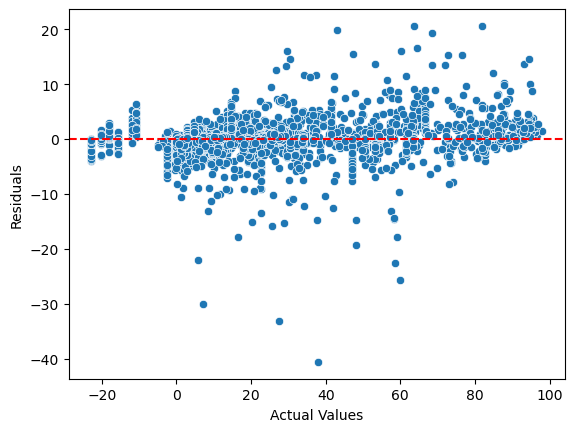

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Data
file_path = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"
df = pd.read_csv(file_path)

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Streamlit UI
st.title("Climate Change & Energy Impact Analysis")
st.subheader("Exploratory Data Analysis")

# Country and Feature Selection
selected_countries = st.multiselect("Select Countries", df['Entity'].unique(), default=df['Entity'].unique())
selected_features = st.multiselect("Select Features", df.columns[2:-1], default=df.columns[2:-1])

df = df[df['Entity'].isin(selected_countries)]

st.write("### Dataset Overview")
st.write(df[selected_features].head())

st.write("### Summary Statistics")
st.write(df[selected_features].describe())

st.write("### Missing Values")
st.write(df[selected_features].isnull().sum())

# Handle Missing Values (Imputation or Dropping as needed)
df.dropna(inplace=True)  # Can be replaced with df.fillna(df.mean()) if needed

# Feature and Target Selection
features = selected_features
targets = ['Average Temperature', 'mmfrom1993-2008average', 'Renewable energy consumption (% of total final energy consumption)']

# Train Model Function
def train_model(X, y, model_type='random_forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    if model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
    elif model_type == 'lstm':
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)
        
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(1)  # Ensure single output
        ])
        
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Model Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2

# Model Selection
model_choice = st.selectbox("Select Model", ["Random Forest", "LSTM"])
X = df[features]
y = df[targets]

if model_choice == "Random Forest":
    selected_model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='random_forest')
elif model_choice == "LSTM":
    selected_model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='lstm')

# Display Metrics
st.write("### Model Performance")
st.write(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Feature Importance (for Random Forest)
if model_choice == "Random Forest":
    st.write("### Feature Importance")
    feature_importance = selected_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
    fig, ax = plt.subplots()
    sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax)
    st.pyplot(fig)

# Residual Plot
st.write("### Residual Analysis")
fig, ax = plt.subplots()
sns.scatterplot(x=y_test.values.flatten(), y=(y_test.values.flatten() - y_pred.flatten()), ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Residuals")
st.pyplot(fig)


2.0

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Data
file_path = r"C:\Users\hp\Desktop\Calvin Desktop\Capstone Project  -  Group 8\Data\Climate Change - datasets\climate_data_final_df.csv"
df = pd.read_csv(file_path)

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Streamlit UI
st.title("Climate Change & Energy Impact Analysis")
st.subheader("Exploratory Data Analysis")

# Country and Feature Selection
selected_countries = st.multiselect("Select Countries", df['Entity'].unique(), default=df['Entity'].unique())
selected_features = st.multiselect("Select Features", df.columns[2:], default=df.columns[2:])

df = df[df['Entity'].isin(selected_countries)]

st.write("### Dataset Overview")
st.write(df[selected_features].head())

st.write("### Summary Statistics")
st.write(df[selected_features].describe())

st.write("### Missing Values")
st.write(df[selected_features].isnull().sum())

# Handle Missing Values (Imputation or Dropping as needed)
df.dropna(inplace=True)  # Can be replaced with df.fillna(df.mean()) if needed

# Feature and Target Selection
targets = ['Average Temperature', 'mmfrom1993-2008average', 'Renewable energy consumption (% of total final energy consumption)']
features = [col for col in selected_features if col not in targets]  # Prevent feature leakage

# Train Model Function
def train_model(X, y, model_type='random_forest'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    if model_type == 'random_forest':
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
    elif model_type == 'lstm':
        X_train = np.expand_dims(X_train, axis=-1)
        X_test = np.expand_dims(X_test, axis=-1)
        
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(1)  # Ensure single output
        ])
        
        model.compile(optimizer='adam', loss='mse')
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    
    y_pred = model.predict(X_test)
    
    # Model Performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2

# Model Selection
model_choice = st.selectbox("Select Model", ["Random Forest", "LSTM"])
X = df[features]
y = df[targets]

if model_choice == "Random Forest":
    selected_model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='random_forest')
elif model_choice == "LSTM":
    selected_model, scaler, X_train, X_test, y_test, y_pred, mae, rmse, r2 = train_model(X, y, model_type='lstm')

# Display Metrics
st.write("### Model Performance")
st.write(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Feature Importance (for Random Forest)
if model_choice == "Random Forest":
    st.write("### Feature Importance")
    feature_importance = selected_model.feature_importances_
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
    fig, ax = plt.subplots()
    sns.barplot(x='Importance', y='Feature', data=importance_df, ax=ax)
    st.pyplot(fig)

# Residual Plot
st.write("### Residual Analysis")
fig, ax = plt.subplots()
sns.scatterplot(x=y_test.values.flatten(), y=(y_test.values.flatten() - y_pred.flatten()), ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel("Actual Values")
ax.set_ylabel("Residuals")
st.pyplot(fig)

# Streamlit Execution Fix
if __name__ == "__main__":
    st.write("App Running Correctly.")


2025-03-26 23:02:39.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.894 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-26 23:02:39.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar